In [50]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [56]:
id <- "1K1gNOxeiYrkQlw_hhni3Xjuwgen_0ZAE" # google drive file ID #
sleep_data = read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id)) # Google drive export link #
sleep_data

sr,rr,t,lm,bo,rem,sr.1,hr,sl
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
93.80,25.680,91.840,16.60,89.840,99.60,1.840,74.20,3
91.64,25.104,91.552,15.88,89.552,98.88,1.552,72.76,3
60.00,20.000,96.000,10.00,95.000,85.00,7.000,60.00,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


In [57]:
# url <- "https://www.kaggle.com/laavanya/human-stress-detection-in-and-through-sleep/download"
# sleep_data <- read_csv (url, skip = )
# sleep_data

In [58]:
sleep_data_mutated <- mutate(sleep_data, sl = as_factor(sl))
sleep_data_mutated

sr,rr,t,lm,bo,rem,sr.1,hr,sl
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
93.80,25.680,91.840,16.60,89.840,99.60,1.840,74.20,3
91.64,25.104,91.552,15.88,89.552,98.88,1.552,72.76,3
60.00,20.000,96.000,10.00,95.000,85.00,7.000,60.00,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


In [59]:
selected_coloumns <- select(sleep_data_mutated, sr.1, hr, rr, t, sl)        
selected_coloumns

sr.1,hr,rr,t,sl
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.840,74.20,25.680,91.840,3
1.552,72.76,25.104,91.552,3
7.000,60.00,20.000,96.000,1
⋮,⋮,⋮,⋮,⋮
0.000,78.76,27.504,86.880,4
6.728,59.32,19.728,95.728,1
4.088,63.48,21.392,93.392,2


In [60]:
sleep_data_sliced <- slice(selected_coloumns, 1:200)
sleep_data_sliced

sr.1,hr,rr,t,sl
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.840,74.20,25.680,91.840,3
1.552,72.76,25.104,91.552,3
7.000,60.00,20.000,96.000,1
⋮,⋮,⋮,⋮,⋮
8.456,53.64,17.456,98.184,0
3.104,61.84,20.736,92.736,2
1.168,70.84,24.336,91.168,3


In [62]:
sleep_split <- initial_split(sleep_data_sliced, prop = 0.75, strata = sl)
sleep_train <- training(sleep_split)
sleep_test <- testing(sleep_split)
sleep_train
sleep_test

,sr.1,hr,rr,t,sl
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,1.552,72.76,25.104,91.552,3
3,7.000,60.00,20.000,96.000,1
4,0.768,68.84,23.536,90.768,3
⋮,⋮,⋮,⋮,⋮,⋮
197,7.384,50.96,16.384,96.576,0
198,8.456,53.64,17.456,98.184,0
200,1.168,70.84,24.336,91.168,3


,sr.1,hr,rr,t,sl
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.840,74.20,25.680,91.840,3
8,9.000,55.00,18.000,99.000,0
17,5.528,56.32,18.528,94.528,1
⋮,⋮,⋮,⋮,⋮,⋮
187,7.816,52.04,16.816,97.224,0
191,5.560,56.40,18.560,94.560,1
199,3.104,61.84,20.736,92.736,2


In [87]:
sleep_data_aggregate <- sleep_train %>%
summarize(across(sr.1:t, mean, na.rm = TRUE))
sleep_data_aggregate

sr.1,hr,rr,t
<dbl>,<dbl>,<dbl>,<dbl>
3.851817,64.23791,21.69516,92.82363


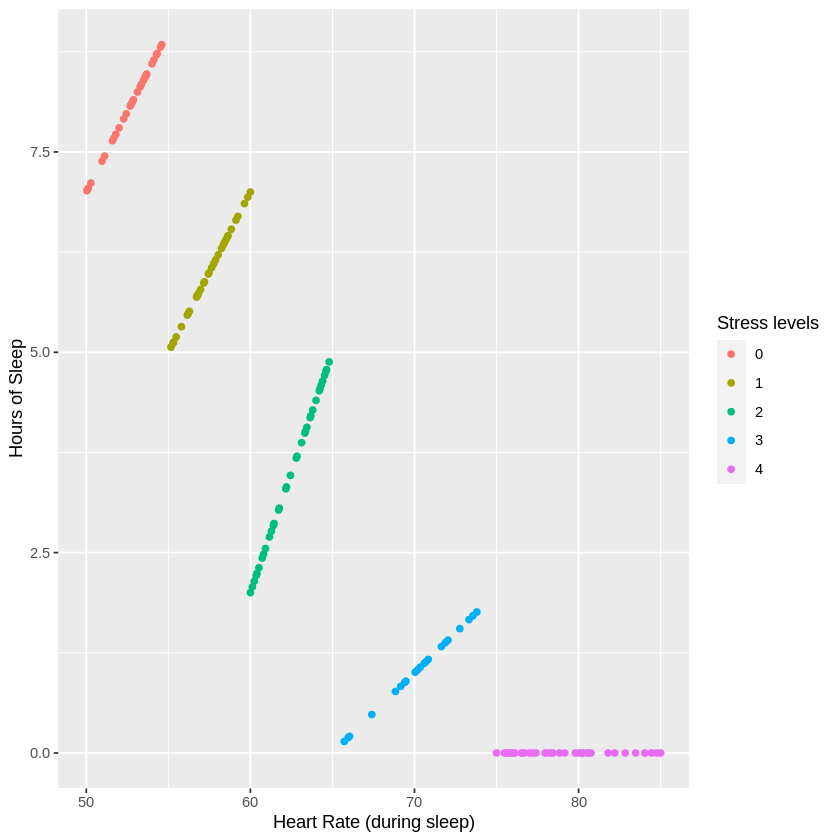

In [65]:
sleep_train_plot <- ggplot(sleep_train, aes( x = hr, y = sr.1, color = sl)) +
geom_point() +
labs(x = "Heart Rate (during sleep)", y = "Hours of Sleep", color = "Stress levels")
sleep_train_plot

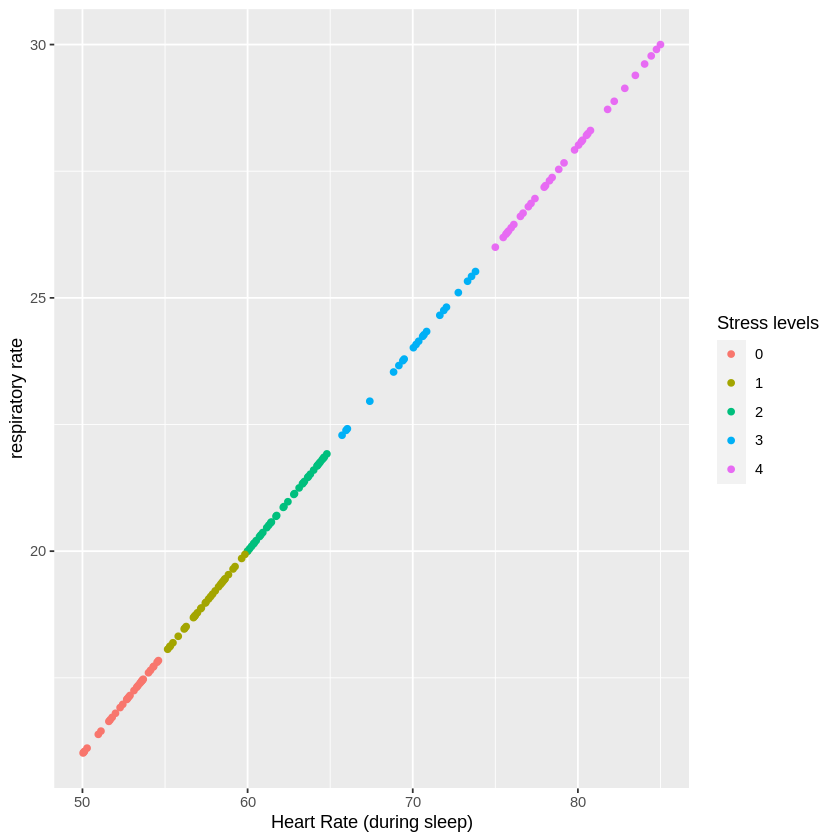

In [66]:
sleep_train_plot <- ggplot(sleep_train, aes( x = hr, y = rr, color = sl)) +
geom_point() +
labs(x = "Heart Rate (during sleep)", y = "respiratory rate", color = "Stress levels")
sleep_train_plot

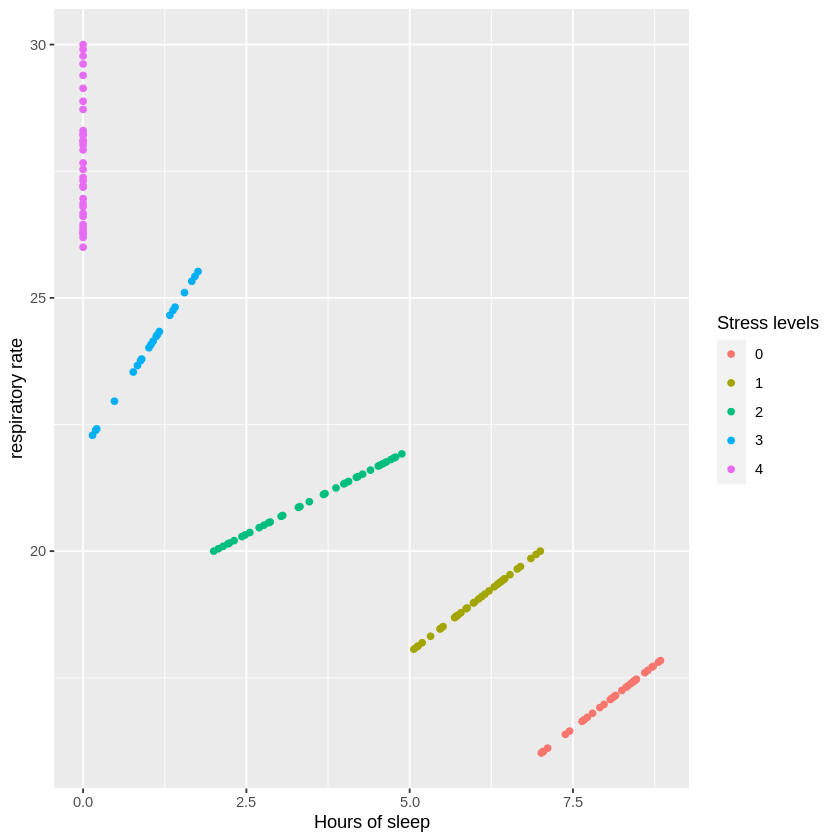

In [67]:
sleep_train_plot <- ggplot(sleep_train, aes( x = sr.1, y = rr, color = sl)) +
geom_point() +
labs(x = "Hours of sleep", y = "respiratory rate", color = "Stress levels")
sleep_train_plot

In [ ]:
sleep_train_plot <- ggplot(sleep_train, aes( x = , y = rr, color = sl)) +
geom_point() +
labs(x = "Hours of sleep", y = "respiratory rate", color = "Stress levels")
sleep_train_plot